In [24]:
from torch.utils.data.dataset import Dataset
import os
from os.path import isfile, join
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import transforms
import torch
import torch.optim as optim
from torch.autograd import Variable
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn

%matplotlib inline

## Following image process step-by-step

In [34]:

def load_images(path):
    
    '''
    for a list of images under a folder 
    to get the dir for each image
    '''
    
    images_dir = [join(path, f) for f in os.listdir(path) if isfile(join(path, f))]
    images_dir.sort()

    return images_dir

In [40]:
data_path = load_images('./data/train/')
labels_path = load_images('./data/train_masks/')

In [41]:
data_path[0:5]

['./data/train/00087a6bd4dc_01.jpg',
 './data/train/00087a6bd4dc_02.jpg',
 './data/train/00087a6bd4dc_03.jpg',
 './data/train/00087a6bd4dc_04.jpg',
 './data/train/00087a6bd4dc_05.jpg']

In [42]:
labels_path[0:5]

['./data/train_masks/00087a6bd4dc_01_mask.gif',
 './data/train_masks/00087a6bd4dc_02_mask.gif',
 './data/train_masks/00087a6bd4dc_03_mask.gif',
 './data/train_masks/00087a6bd4dc_04_mask.gif',
 './data/train_masks/00087a6bd4dc_05_mask.gif']

In [45]:
img_1 = Image.open(data_path[1])
target_1 = Image.open(labels_path[1]) 

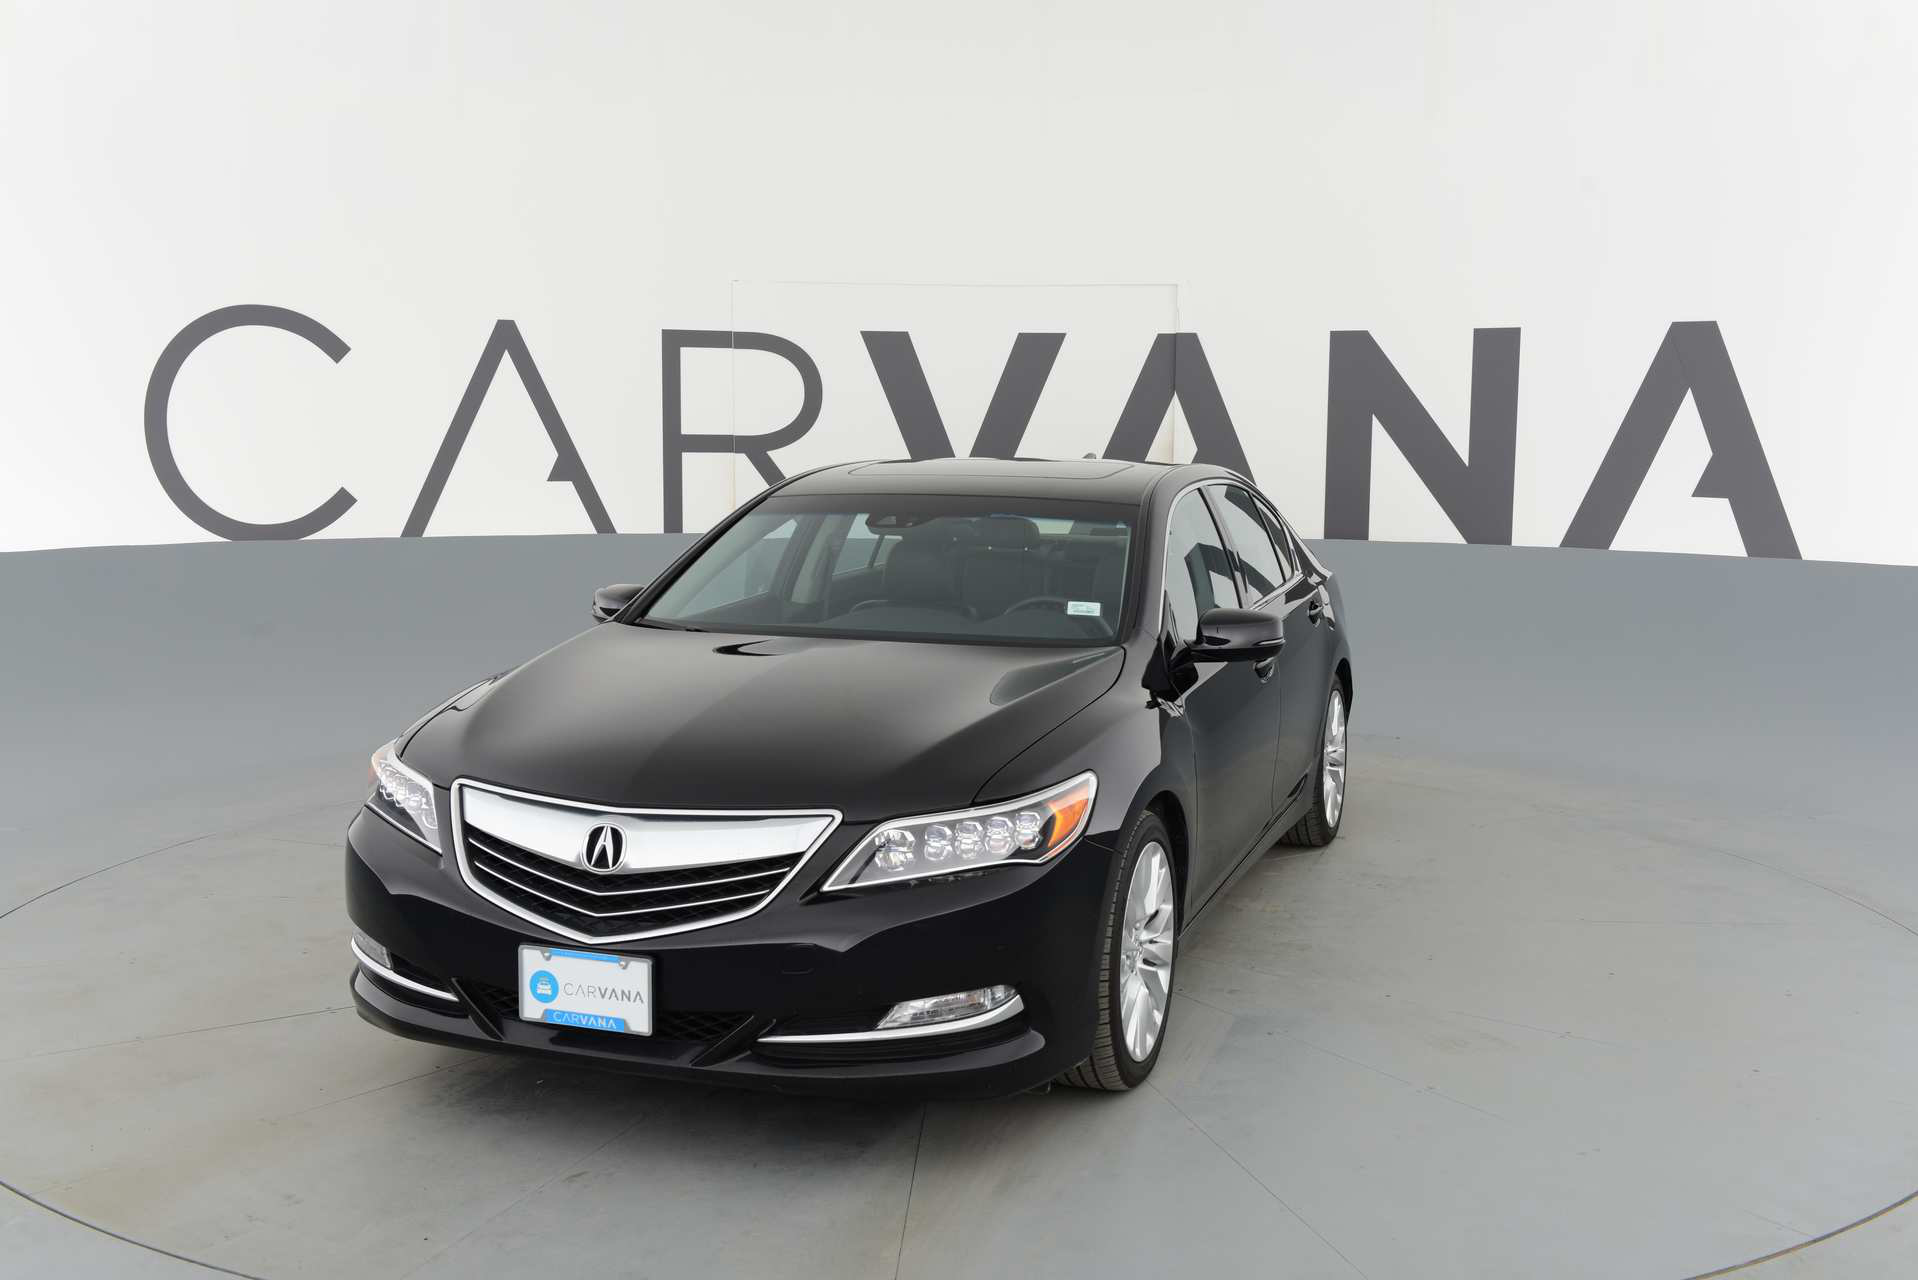

In [46]:
img_1

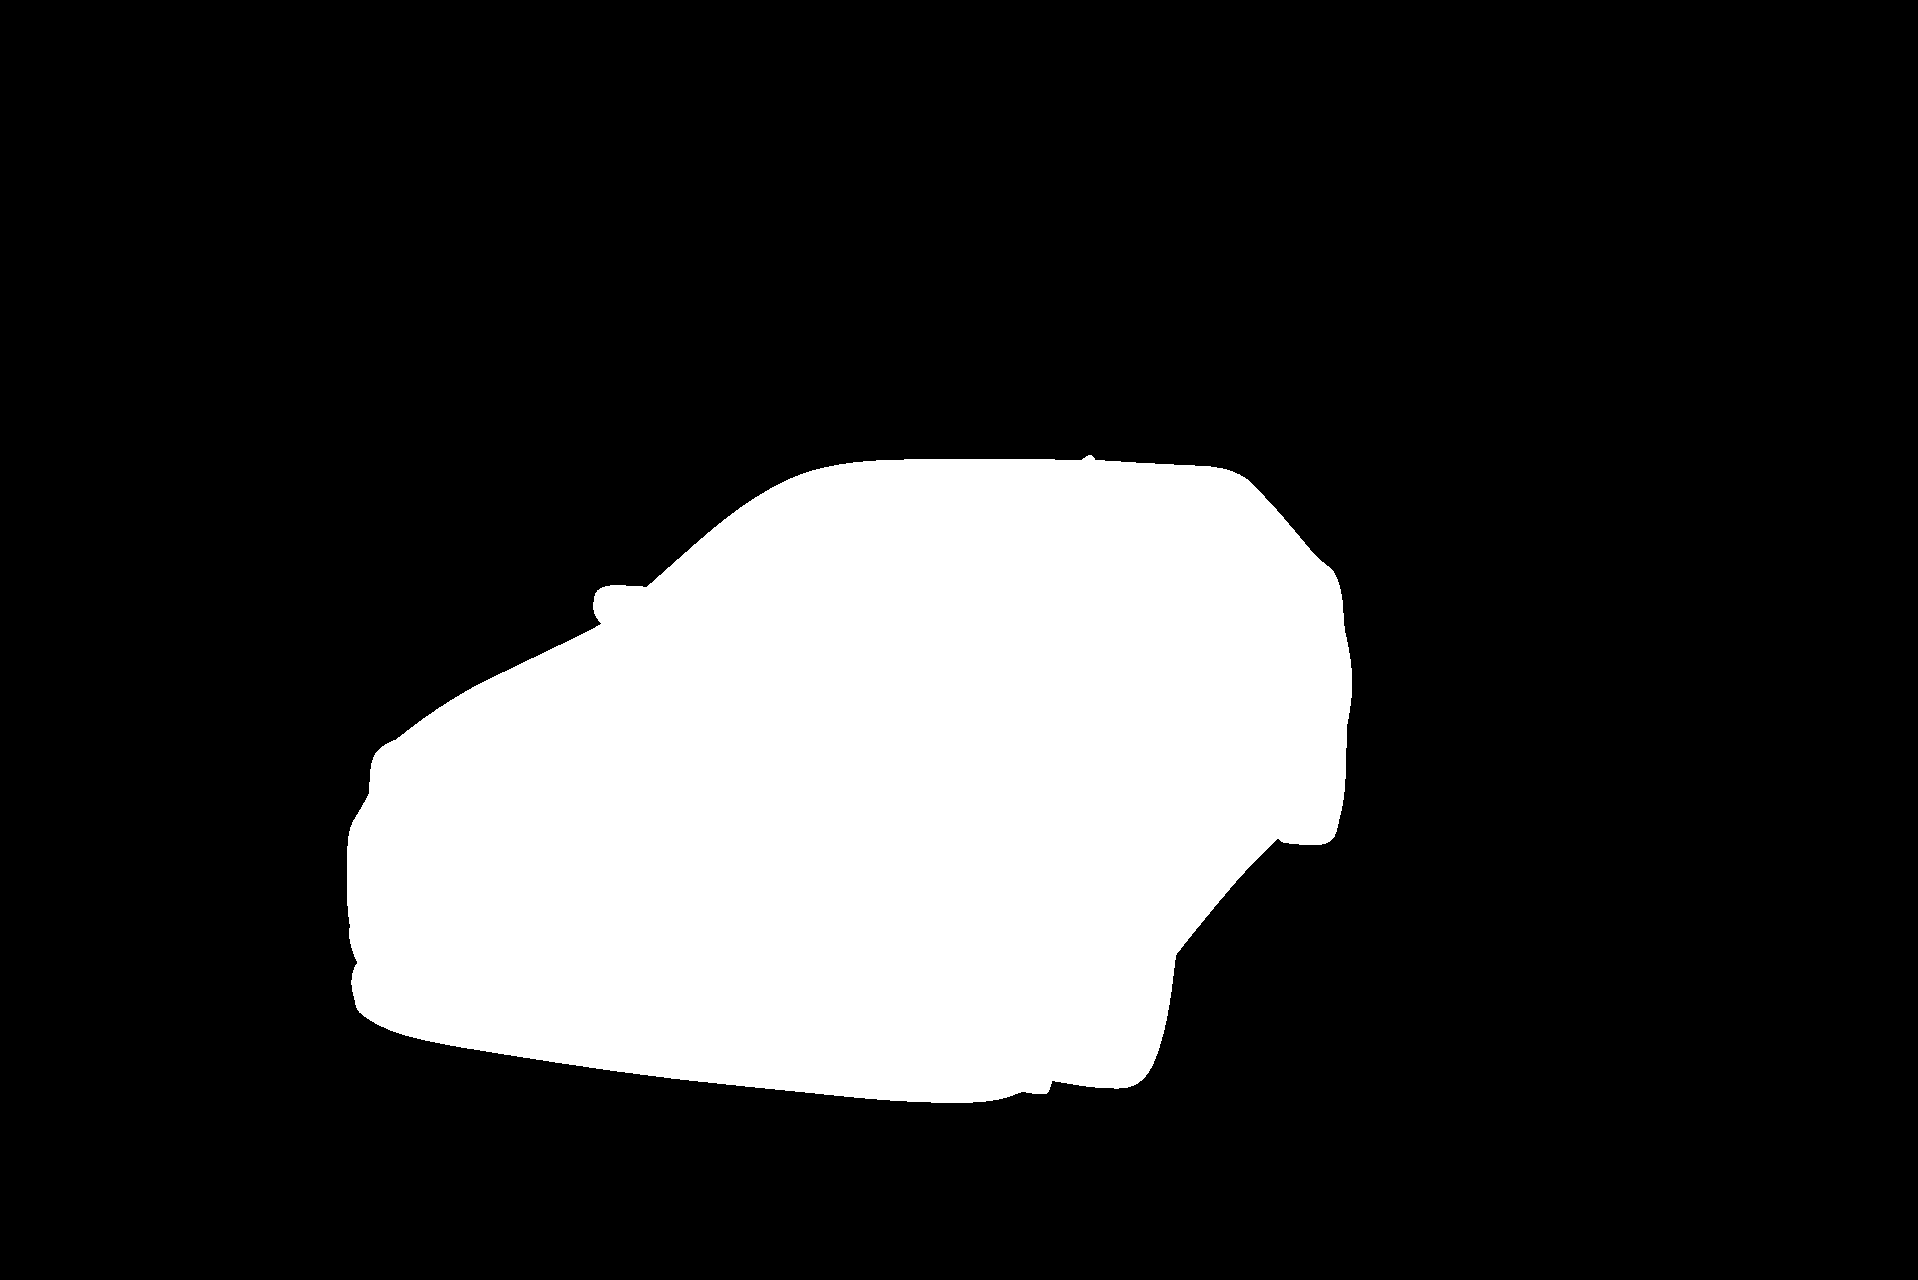

In [47]:
target_1

In [62]:
# transform
from torchvision import transforms
transform=transforms.Compose([transforms.Scale((256,256)),transforms.ToTensor()])
img_transformed = transform(img_1)
img_transformed


( 0 ,.,.) = 
  0.9490  0.9490  0.9569  ...   0.9569  0.9569  0.9569
  0.9490  0.9490  0.9529  ...   0.9569  0.9569  0.9569
  0.9490  0.9490  0.9490  ...   0.9569  0.9569  0.9569
           ...             ⋱             ...          
  0.7020  0.7020  0.6980  ...   0.6902  0.6902  0.6902
  0.7020  0.6980  0.6980  ...   0.6863  0.6902  0.6902
  0.7020  0.6980  0.6941  ...   0.6824  0.6902  0.6902

( 1 ,.,.) = 
  0.9529  0.9529  0.9569  ...   0.9569  0.9569  0.9569
  0.9529  0.9529  0.9529  ...   0.9569  0.9569  0.9569
  0.9529  0.9529  0.9490  ...   0.9569  0.9569  0.9569
           ...             ⋱             ...          
  0.7176  0.7176  0.7137  ...   0.7059  0.7059  0.7059
  0.7176  0.7137  0.7137  ...   0.7020  0.7059  0.7059
  0.7176  0.7137  0.7098  ...   0.6980  0.7059  0.7059

( 2 ,.,.) = 
  0.9333  0.9333  0.9529  ...   0.9569  0.9569  0.9569
  0.9333  0.9333  0.9490  ...   0.9569  0.9569  0.9569
  0.9333  0.9333  0.9451  ...   0.9569  0.9569  0.9569
           ...         


( 0 ,.,.) = 
  0.9490  0.9490  0.9569  ...   0.9569  0.9569  0.9569
  0.9490  0.9490  0.9529  ...   0.9569  0.9569  0.9569
  0.9490  0.9490  0.9490  ...   0.9569  0.9569  0.9569
           ...             ⋱             ...          
  0.7020  0.7020  0.6980  ...   0.6902  0.6902  0.6902
  0.7020  0.6980  0.6980  ...   0.6863  0.6902  0.6902
  0.7020  0.6980  0.6941  ...   0.6824  0.6902  0.6902

( 1 ,.,.) = 
  0.9529  0.9529  0.9569  ...   0.9569  0.9569  0.9569
  0.9529  0.9529  0.9529  ...   0.9569  0.9569  0.9569
  0.9529  0.9529  0.9490  ...   0.9569  0.9569  0.9569
           ...             ⋱             ...          
  0.7176  0.7176  0.7137  ...   0.7059  0.7059  0.7059
  0.7176  0.7137  0.7137  ...   0.7020  0.7059  0.7059
  0.7176  0.7137  0.7098  ...   0.6980  0.7059  0.7059

( 2 ,.,.) = 
  0.9333  0.9333  0.9529  ...   0.9569  0.9569  0.9569
  0.9333  0.9333  0.9490  ...   0.9569  0.9569  0.9569
  0.9333  0.9333  0.9451  ...   0.9569  0.9569  0.9569
           ...         

In [ ]:
to_PIL = transforms.ToPILImage()

In [58]:
IMG_1 = np.array(to_PIL(img_transformed))
IMG_1

array([[[242, 243, 238],
        [242, 243, 238],
        [244, 244, 243],
        ..., 
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[242, 243, 238],
        [242, 243, 238],
        [243, 243, 242],
        ..., 
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[242, 243, 238],
        [242, 243, 238],
        [242, 242, 241],
        ..., 
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       ..., 
       [[179, 183, 186],
        [179, 183, 186],
        [178, 182, 185],
        ..., 
        [176, 180, 179],
        [176, 180, 179],
        [176, 180, 179]],

       [[179, 183, 186],
        [178, 182, 185],
        [178, 182, 185],
        ..., 
        [175, 179, 178],
        [176, 180, 179],
        [176, 180, 179]],

       [[179, 183, 186],
        [178, 182, 185],
        [177, 181, 184],
        ..., 
        [174, 178, 177],
        [176, 180, 179],
        [176, 180,

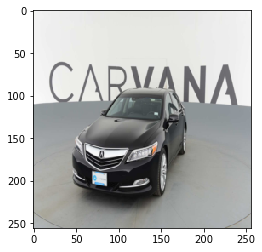

In [61]:
plt.imshow(IMG_1)

## preprocess images ---- Complete stuffs

In [ ]:
class CARVANA(Dataset):
    """
        CARVANA dataset that contains car images as .jpg. Each car has 16 images
        taken in different angles.
    """

    def __init__(self, root, subset="train", transform=None):
        
        # initialize variables
        self.root = os.path.expanduser(root)
        self.transform = transform
        self.subset = subset
        self.data_path, self.labels_path = [], []

        
        def load_images(path):
            
            images_dir = [join(path, f) for f in os.listdir(path) if isfile(join(path, f))]
            images_dir.sort()
            
            return images_dir

        # load the data regarding the subset
        if self.subset == "train":
            self.data_path = load_images(self.root + "/train")
            self.labels_path = load_images(self.root + "/train_masks")
        elif self.subset == "val":
            self.data_path = load_images(self.root + "/val")
            self.labels_path = load_images(self.root + "/val_masks")

    def __getitem__(self, index):
        # load image and labels
        img = Image.open(self.data_path[index])
        target = Image.open(self.labels_path[index]) if not self.subset == 'test' else None

        # apply transforms to both
        if self.transform is not None:
            img = self.transform(img)
            target = self.transform(target)

        return img, target

    def __len__(self):
        return len(self.data_path)



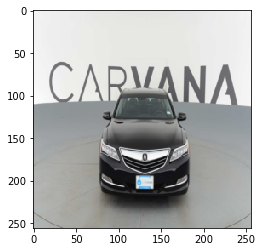

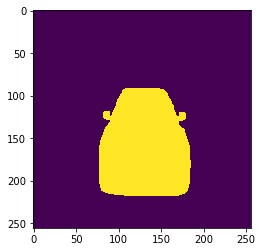

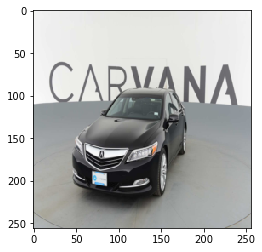

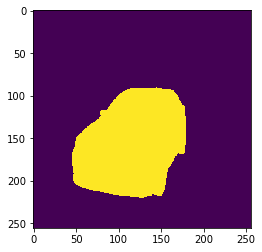

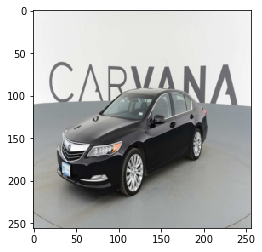

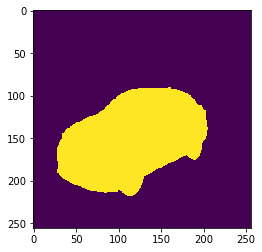

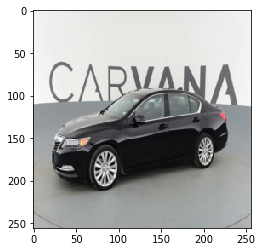

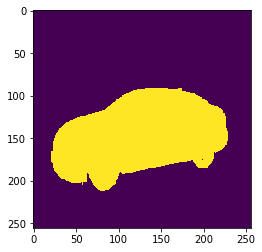

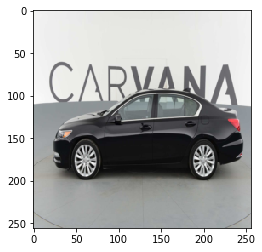

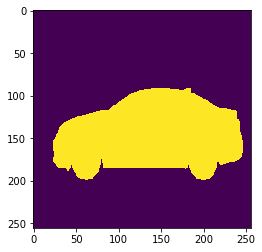

In [26]:
# create datasets
train_dataset = CARVANA(root='./data',
                              subset="train",
                              transform=transforms.Compose([
                                  transforms.Scale((256,256)),
                                  transforms.ToTensor()])
                              )

# define a simple function to show image-labels
def im_show(img_list):

    to_PIL = transforms.ToPILImage()
        
    for idx, img in enumerate(img_list):
        img = np.array(to_PIL(img))
        #plt.subplot(100 + 10 * len(img_list) + (idx + 1))
        fig = plt.imshow(img)
        #fig.axes.get_xaxis().set_visible(False)
        #fig.axes.get_yaxis().set_visible(False)
    
        plt.show()

img_list = []
for i in range(5):
    img, label = train_dataset[i]
    img_list.append(img)
    img_list.append(label)
    
im_show(img_list)
    